<h2> Importing Libraries </h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import io

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#import os
#path = '/content/drive/My Drive/Colab Notebooks/a3/data'
#os.chdir(path)

<h2> Importing Datasets </h2>

In [3]:
x_test = pd.read_csv("x_test.csv")
x_train = pd.read_csv("x_train.csv")
y_test = pd.read_csv("y_test.csv")
y_train = pd.read_csv("y_train.csv")

In [4]:
y_test_copy = pd.read_csv("y_test.csv")

In [5]:
y_test_copy

,0
0,4
1,2
2,2
3,2
4,0
...,...
9995,4
9996,2
9997,3
9998,2


<h2> Preprocessing of Data </h2>

In [6]:
# Data Preprocessing function
def data_preprocessing(raw):
    num_images = raw.shape[0]
    x_as_array = raw.values[:,:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x

In [7]:
# Let us apply pre-processing on data 
x_train = data_preprocessing(x_train)
x_test = data_preprocessing(x_test)

<h1> Default Network </h1>

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 5)
y_test = tf.keras.utils.to_categorical(y_test, 5)

In [9]:
CNN_model = tf.keras.models.Sequential()
CNN_model.add(
    tf.keras.layers.Conv2D(
        filters=32, # How many filters 
        kernel_size=(3, 3), # Size of feature map 
        strides=(1, 1), 
        padding='same', 
        activation='relu', # Rectified Linear Unit Activation Function
        input_shape=(28, 28, 1) 
    )
) 

CNN_model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), # Size feature will be mapped to
        # strides=(2, 2) # How the pool "steps" across the feature
        padding = "SAME"
    )
)

CNN_model.add(
    tf.keras.layers.Conv2D(
        filters=32, # How many filters 
        kernel_size=(3, 3), 
        strides=(1, 1), # How the feature map "steps" across the image
        padding='same', 
        activation='relu', # Rectified Linear Unit Activation Function
        
    )
)
CNN_model.add(
    tf.keras.layers.Flatten()
)
CNN_model.add(
    tf.keras.layers.Dense(
        units=5, # Output shape
        activation='softmax' # Softmax Activation Function
    )
)


In [10]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 31365     
                                                                 
Total params: 40933 (159.89 KB)
Trainable params: 40933 (159.89 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [12]:
import time
from tensorflow.keras.optimizers import SGD

# Define the SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with SGD optimizer
CNN_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
start_time = time.time()

#Train 
data=CNN_model.fit(x_train, y_train, batch_size=15, epochs=10)
end_time =time.time()
print("Total training time  is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = CNN_model.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss, accuracy = CNN_model.evaluate(x_test, y_test)

Epoch 1/10
4000/4000 [==============================] - 89s 22ms/step - loss: 0.3466 - accuracy: 0.8734
Epoch 2/10
4000/4000 [==============================] - 81s 20ms/step - loss: 0.2320 - accuracy: 0.9165
Epoch 3/10
4000/4000 [==============================] - 77s 19ms/step - loss: 0.2019 - accuracy: 0.9259
Epoch 4/10
4000/4000 [==============================] - 77s 19ms/step - loss: 0.1847 - accuracy: 0.9334
Epoch 5/10
4000/4000 [==============================] - 77s 19ms/step - loss: 0.1729 - accuracy: 0.9377
Epoch 6/10
4000/4000 [==============================] - 76s 19ms/step - loss: 0.1613 - accuracy: 0.9423
Epoch 7/10
4000/4000 [==============================] - 75s 19ms/step - loss: 0.1528 - accuracy: 0.9452
Epoch 8/10
4000/4000 [==============================] - 76s 19ms/step - loss: 0.1475 - accuracy: 0.9463
Epoch 9/10
4000/4000 [==============================] - 76s 19ms/step - loss: 0.1415 - accuracy: 0.9494
Epoch 10/10
4000/4000 [==============================] - 76s 19m

In [13]:
pred = CNN_model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


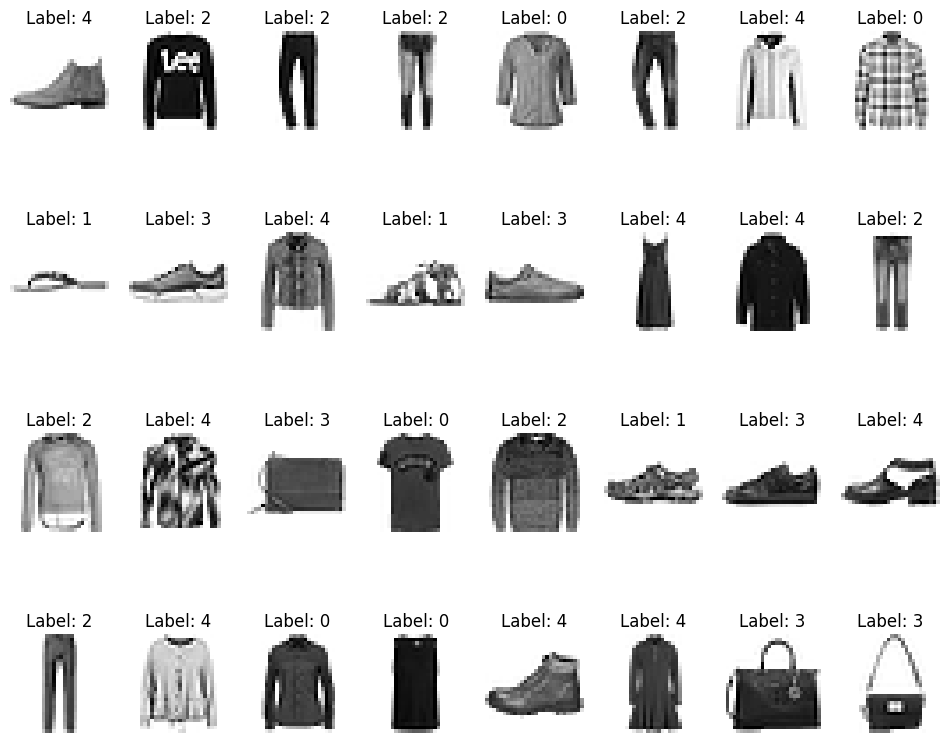

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 8, figsize=(12,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='binary')
    ax.set(title = f"Label: {np.argmax(y_test[i])}")
    ax.axis('off')
plt.show()


As you can see in the above snippet of the code that after training the model what are the labels outputs are.

`For Default Network Architecture of CNN:`

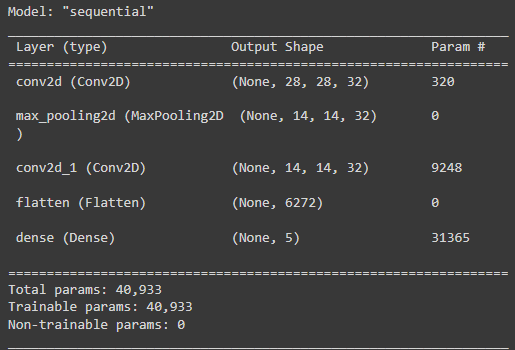

`Analysis of Training and Testing time along with the Testing set Accuracy:`

Total training time  is 2.68 minutes
313/313 [==============================] - 1s 2ms/step

Total testing time  is 0.02 minutes
313/313 [==============================] - 1s 3ms/step - loss: 0.2187 - accuracy: 0.9226

We can clearly seen that for default network, we got thw accuracy of 92.26% and total loss of 21.87%.






<h1> Own Network </h1>

Classify the data using any other architecture that you want to try. For example, you may want
to put more fully connected layers after the last output of the CNN, or try more CNN layers, a
different optimizer, or different parameters for the existing layers.

• You can use any CNN-based approach or other DNN variants to solve the classification
problem. You can explore any architecture of the network you like. Be sure to cite any
sources you used.

• Whatever you try, be sure to provide a clear explanation of your model(s) (algorithms,
network architecture, optimizers, regularization, design choices, numbers of parameters)
that would be sufficient for someone to recreate it. Consider making a diagram to clarify
the design.


In [15]:
fmnist_CNN_model = tf.keras.models.Sequential()
fmnist_CNN_model.add(
    tf.keras.layers.Conv2D(
        32,
        kernel_size=(3,3),
        activation='linear',
        input_shape=(28,28,1),
        padding='same'
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.LeakyReLU(
        alpha=0.1
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.MaxPooling2D(
        (2, 2),
        padding='same'
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.Conv2D(
        64,
        (3, 3),
        activation='linear',
        padding='same'
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.LeakyReLU(
        alpha=0.1
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        padding='same'
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.Conv2D(
        256,
        (3, 3),
        activation='linear',
        padding='same'
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.LeakyReLU(
        alpha=0.1
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        padding='same'
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.Flatten()
)

fmnist_CNN_model.add(
    tf.keras.layers.Dense(
        64,
        activation='linear'
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.LeakyReLU(
        alpha=0.1
    )
)

fmnist_CNN_model.add(
    tf.keras.layers.Dense(
        5,
        activation='softmax'
    )
)

In [16]:
fmnist_CNN_model

In [17]:
fmnist_CNN_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [18]:
from tensorflow.keras.utils import to_categorical
fmnist_CNN_train_model = fmnist_CNN_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 189s 100ms/step - loss: 0.3056 - accuracy: 0.8866
Epoch 2/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.1886 - accuracy: 0.9322
Epoch 3/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.1522 - accuracy: 0.9445
Epoch 4/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.1287 - accuracy: 0.9531
Epoch 5/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.1096 - accuracy: 0.9595
Epoch 6/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0919 - accuracy: 0.9663
Epoch 7/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0764 - accuracy: 0.9718
Epoch 8/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0663 - accuracy: 0.9748
Epoch 9/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0594 - accuracy: 0.9781
Epoch 10/10
1875/1875 [=======================

In [19]:
y_test

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [20]:
y_test_copy

,0
0,4
1,2
2,2
3,2
4,0
...,...
9995,4
9996,2
9997,3
9998,2


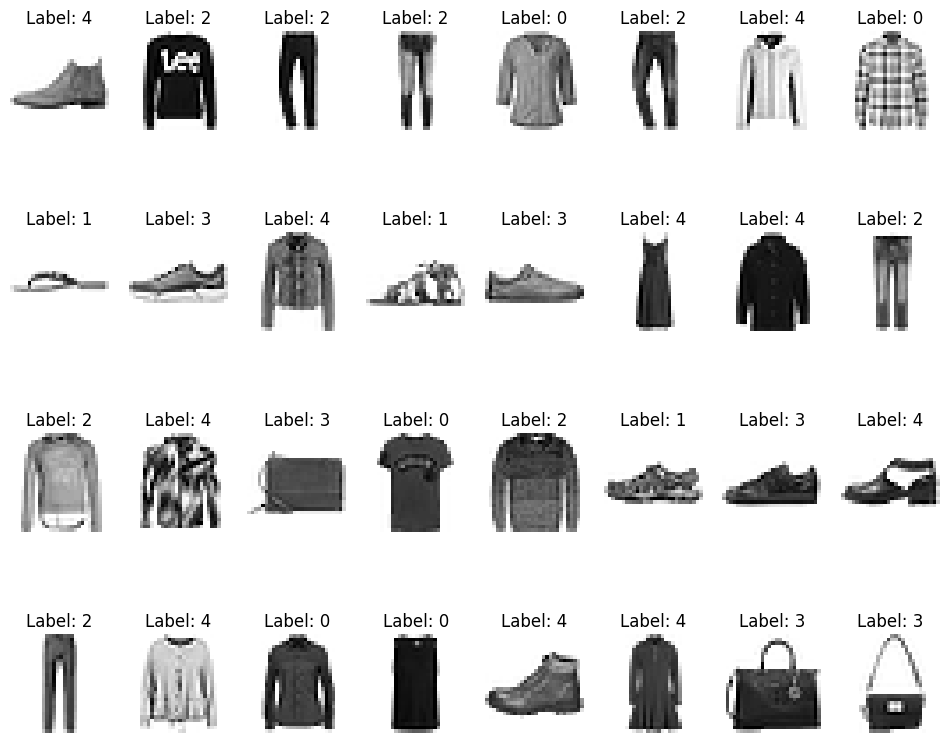

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 8, figsize=(12,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='binary')
    ax.set(title = f"Label: {np.argmax(y_test[i])}")
    ax.axis('off')
plt.show()

In [22]:
start_time = time.time()
end_time =time.time()
print("Total training time  is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = fmnist_CNN_model.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss, accuracy = fmnist_CNN_model.evaluate(x_test, y_test)

Total training time  is 0.00 minutes
313/313 [==============================] - 9s 30ms/step
Total testing time  is 0.18 minutes
313/313 [==============================] - 9s 30ms/step - loss: 0.2710 - accuracy: 0.9373


### Create our 2nd Own Model named `testmodel1`

In [23]:
testmodel1 = tf.keras.models.Sequential()

testmodel1.add(tf.keras.layers.Conv2D(123,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))

testmodel1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

testmodel1.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))

testmodel1.add(tf.keras.layers.Conv2D(64,(3, 3),activation='linear',padding='same'))

testmodel1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

testmodel1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))

testmodel1.add(tf.keras.layers.Conv2D(64,(3, 3),activation='linear',padding='same'))

testmodel1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))

testmodel1.add(tf.keras.layers.Conv2D(256,(3, 3),activation='linear',padding='same'))

testmodel1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

testmodel1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))

testmodel1.add(tf.keras.layers.Flatten())

testmodel1.add(tf.keras.layers.Dense(64,activation='linear'))

testmodel1.add(tf.keras.layers.LeakyReLU(alpha=0.1))

testmodel1.add(tf.keras.layers.Dense(5,activation='softmax'))


In [24]:
testmodel1

In [25]:
testmodel1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [26]:
from tensorflow.keras.utils import to_categorical
testmodel1_trained = testmodel1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 347s 184ms/step - loss: 0.3092 - accuracy: 0.8852
Epoch 2/10
1875/1875 [==============================] - 347s 185ms/step - loss: 0.1903 - accuracy: 0.9304
Epoch 3/10
1875/1875 [==============================] - 347s 185ms/step - loss: 0.1582 - accuracy: 0.9422
Epoch 4/10
1875/1875 [==============================] - 349s 186ms/step - loss: 0.1345 - accuracy: 0.9507
Epoch 5/10
1875/1875 [==============================] - 348s 185ms/step - loss: 0.1181 - accuracy: 0.9556
Epoch 6/10
1875/1875 [==============================] - 358s 191ms/step - loss: 0.1026 - accuracy: 0.9617
Epoch 7/10
1875/1875 [==============================] - 351s 187ms/step - loss: 0.0909 - accuracy: 0.9662
Epoch 8/10
1875/1875 [==============================] - 348s 186ms/step - loss: 0.0792 - accuracy: 0.9711
Epoch 9/10
1875/1875 [==============================] - 348s 185ms/step - loss: 0.0731 - accuracy: 0.9728
Epoch 10/10
1875/1875 [=======================

In [27]:
start_time = time.time()
end_time =time.time()
print("Total training time  is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = testmodel1.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss, accuracy = testmodel1.evaluate(x_test, y_test)

Total training time  is 0.00 minutes
313/313 [==============================] - 15s 48ms/step
Total testing time  is 0.25 minutes
313/313 [==============================] - 16s 52ms/step - loss: 0.2063 - accuracy: 0.9440


### Create our 3rd Own Model named `testmodel2`

In [28]:
testmodel2 = tf.keras.models.Sequential()

testmodel2.add(tf.keras.layers.Conv2D(123, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
testmodel2.add(tf.keras.layers.LeakyReLU(alpha=0.1))
testmodel2.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
testmodel2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear', padding='same'))
testmodel2.add(tf.keras.layers.LeakyReLU(alpha=0.1))
testmodel2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
testmodel2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear', padding='same'))
testmodel2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
testmodel2.add(tf.keras.layers.Conv2D(256, (3, 3), activation='linear', padding='same'))
testmodel2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
testmodel2.add(tf.keras.layers.Conv2D(32, (3, 3), activation='linear', padding='same'))
testmodel2.add(tf.keras.layers.LeakyReLU(alpha=0.1))
testmodel2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
testmodel2.add(tf.keras.layers.Flatten())
testmodel2.add(tf.keras.layers.Dense(64, activation='linear'))
testmodel2.add(tf.keras.layers.LeakyReLU(alpha=0.1))
testmodel2.add(tf.keras.layers.Dense(5, activation='softmax'))


In [29]:
testmodel2

In [30]:
testmodel2.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [31]:
from tensorflow.keras.utils import to_categorical
testmodel2_trained = testmodel2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 352s 187ms/step - loss: 0.3263 - accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 354s 189ms/step - loss: 0.2016 - accuracy: 0.9272
Epoch 3/10
1875/1875 [==============================] - 351s 187ms/step - loss: 0.1691 - accuracy: 0.9384
Epoch 4/10
1875/1875 [==============================] - 349s 186ms/step - loss: 0.1453 - accuracy: 0.9460
Epoch 5/10
1875/1875 [==============================] - 351s 187ms/step - loss: 0.1292 - accuracy: 0.9519
Epoch 6/10
1875/1875 [==============================] - 355s 190ms/step - loss: 0.1147 - accuracy: 0.9578
Epoch 7/10
1875/1875 [==============================] - 400s 213ms/step - loss: 0.1007 - accuracy: 0.9633
Epoch 8/10
1875/1875 [==============================] - 356s 190ms/step - loss: 0.0925 - accuracy: 0.9661
Epoch 9/10
1875/1875 [==============================] - 352s 188ms/step - loss: 0.0820 - accuracy: 0.9703
Epoch 10/10
1875/1875 [=======================

In [32]:
start_time = time.time()
end_time =time.time()
print("Total training time  is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = testmodel2.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss, accuracy = testmodel2.evaluate(x_test, y_test)

Total training time  is 0.00 minutes
313/313 [==============================] - 15s 48ms/step
Total testing time  is 0.26 minutes
313/313 [==============================] - 15s 49ms/step - loss: 0.2235 - accuracy: 0.9407


In [33]:
history2 = fmnist_CNN_train_model.history
history3 = testmodel1_trained.history
history4 = testmodel2_trained.history

from prettytable import PrettyTable

# Define the training history data for each model
history2 = fmnist_CNN_train_model.history
history3 = testmodel1_trained.history
history4 = testmodel2_trained.history

# Create a table for the training history of model 1
table1 = PrettyTable()
table1.field_names = ["Epoch", "Loss", "Accuracy"]
for i in range(len(history2['loss'])):
    table1.add_row([i+1, history2['loss'][i], history2['accuracy'][i]])

# Create a table for the training history of model 2
table2 = PrettyTable()
table2.field_names = ["Epoch", "Loss", "Accuracy"]
for i in range(len(history3['loss'])):
    table2.add_row([i+1, history3['loss'][i], history3['accuracy'][i]])

# Create a table for the training history of model 3
table3 = PrettyTable()
table3.field_names = ["Epoch", "Loss", "Accuracy"]
for i in range(len(history4['loss'])):
    table3.add_row([i+1, history4['loss'][i], history4['accuracy'][i]])

# Print the tables
print("FMNIST_CNN_MODEL Training History:")
print(table1)
print("\nModel 2 Training History:")
print(table2)
print("\nModel 3 Training History:")
print(table3)


FMNIST_CNN_MODEL Training History:
+-------+---------------------+--------------------+
| Epoch |         Loss        |      Accuracy      |
+-------+---------------------+--------------------+
|   1   |   0.30560302734375  | 0.8866166472434998 |
|   2   |  0.1886289268732071 | 0.9322166442871094 |
|   3   |  0.1521756947040558 | 0.944516658782959  |
|   4   |  0.1287132054567337 | 0.9531000256538391 |
|   5   | 0.10955397039651871 | 0.9595000147819519 |
|   6   | 0.09191733598709106 | 0.9662666916847229 |
|   7   | 0.07644729316234589 | 0.9718166589736938 |
|   8   | 0.06629806756973267 | 0.9748166799545288 |
|   9   | 0.05938282236456871 | 0.9781166911125183 |
|   10  |  0.0486016646027565 | 0.9820833206176758 |
+-------+---------------------+--------------------+

Model 2 Training History:
+-------+---------------------+--------------------+
| Epoch |         Loss        |      Accuracy      |
+-------+---------------------+--------------------+
|   1   |  0.3092053532600403 | 0.885

We made tables of loss and accuracy with trespect to their running epoch and presented it with table at the first. By which we can see that in each and every epoch, How much accuracy and loss that model is getting. In total, we have trained and created 3 own CNN models by which we get to know about the behavious of the models.

The three models which we have created in this part of assignments are as below:

1. fmnist_CNN_model
2. testmodel1
3. testmodel2

Just now,We made tables of loss and accuracy with trespect to their running epoch and presented it with table at the first. By which we can see that in each and every epoch, How much accuracy and loss that model is getting. But in the later part of this assignment, we will examine it with other diffrenet craetive ways so that we can get to know about it's working.

<h1> Results Analysis </h1>

<h3> Point No.1 : Runtime performance for training and testing.

<h4> Point 1.1 : Runtime Performance for Default Network for training and testing.

In [34]:
display("========================================")
display("Run time Performance for Default Network")
display("========================================")
print("\n")
start_time = time.time()
end_time =time.time()
print("Total training time  is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = CNN_model.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss1, accuracy1 = CNN_model.evaluate(x_test, y_test)

'========================================'

'Run time Performance for Default Network'

'========================================'



Total training time  is 0.00 minutes
313/313 [==============================] - 3s 11ms/step
Total testing time  is 0.09 minutes
313/313 [==============================] - 4s 12ms/step - loss: 0.2178 - accuracy: 0.9269


<h4> Point 1.2 : Runtime Performance for my own Network for training and testing.

In [82]:
display("==========================================================")
display("Run time Performance for My Own Network [fmnist-CNN_model]")
display("==========================================================")
print("\n")
start_time = time.time()
end_time =time.time()
print("Total training time  is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = fmnist_CNN_model.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss2, accuracy2 = fmnist_CNN_model.evaluate(x_test, y_test)

print("\n")
display("====================================================")
display("Run time Performance for My Own Network [testmodel1]")
display("====================================================")
print("\n")
start_time = time.time()
end_time =time.time()
print("Total training time  is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = testmodel1.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss3, accuracy3 = testmodel1.evaluate(x_test, y_test)


print("\n")
display("====================================================")
display("Run time Performance for My Own Network [testmodel2]")
display("====================================================")
print("\n")
start_time = time.time()
end_time =time.time()
print("Total training time  is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = testmodel2.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time  is {:0.2f} minutes".format ((end1 - start1)/60.0))
loss1, accuracy4 = testmodel2.evaluate(x_test, y_test)

'=========================================================='

'Run time Performance for My Own Network [fmnist-CNN_model]'

'=========================================================='



Total training time  is 0.00 minutes
313/313 [==============================] - 10s 30ms/step
Total testing time  is 0.16 minutes
313/313 [==============================] - 8s 27ms/step - loss: 0.2710 - accuracy: 0.9373




'===================================================='

'Run time Performance for My Own Network [testmodel1]'

'===================================================='



Total training time  is 0.00 minutes
313/313 [==============================] - 17s 53ms/step
Total testing time  is 0.34 minutes
313/313 [==============================] - 17s 55ms/step - loss: 0.2063 - accuracy: 0.9440




'===================================================='

'Run time Performance for My Own Network [testmodel2]'

'===================================================='



Total training time  is 0.00 minutes
313/313 [==============================] - 17s 53ms/step
Total testing time  is 0.34 minutes
313/313 [==============================] - 16s 50ms/step - loss: 0.2235 - accuracy: 0.9407


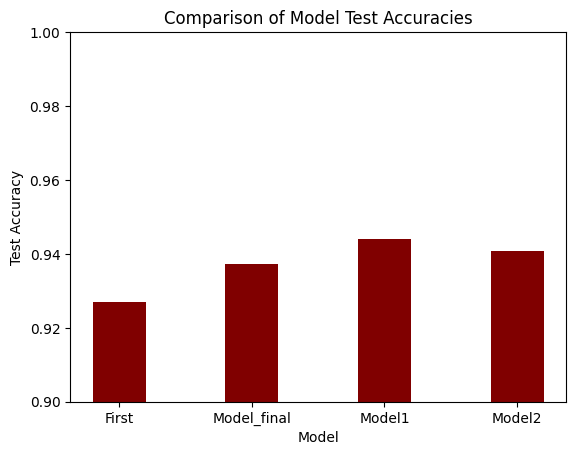

In [36]:
import matplotlib.pyplot as plt

# Data
models = ['First', 'Model_final', 'Model1','Model2']
accuracies = [accuracy1,accuracy2,accuracy3,accuracy4]

# Plotting
plt.bar(models, accuracies, color ='maroon', width = 0.4)

plt.ylim([0.9, 1]) # Set y-axis limits to be between 0 and 1

# Labeling
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.title("Comparison of Model Test Accuracies")

# Show plot
plt.show()


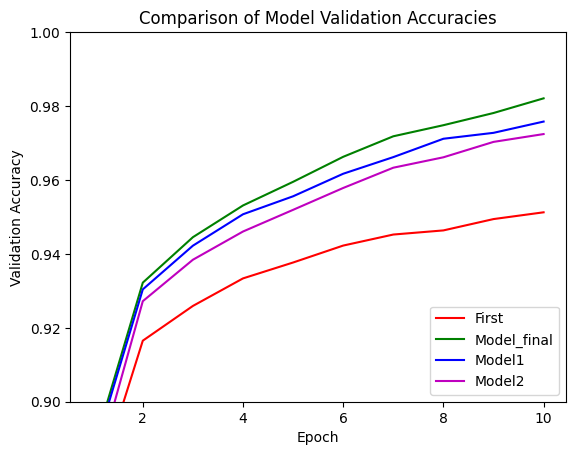

In [37]:
import matplotlib.pyplot as plt

# Data
epochs = range(1, 11)
history1 = data.history
first_acc = history1['accuracy']
final_acc = history2['accuracy']
model1_acc = history3['accuracy']
model2_acc = history4['accuracy']

# Plotting
plt.plot(epochs, first_acc, 'r', label='First')
plt.plot(epochs, final_acc, 'g', label='Model_final')
plt.plot(epochs, model1_acc, 'b', label='Model1')
plt.plot(epochs, model2_acc, 'm', label='Model2')

plt.ylim([0.9, 1]) # Set y-axis limits to be between 0 and 1

# Labeling
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Comparison of Model Validation Accuracies")

plt.legend(loc='lower right')

# Show plot
plt.show()


<h3> Point No.2 : Comparison of the different hyper-parameters or designs you tried.

<h3> Point 2.1 : For Default Network, Comparison of the different hyper-parameters or designs you tried.

In [38]:
history1 = data.history

We will compare the hyper parameters of each of the models in the point 2.2.

<h3> Point 2.2 : For My Own Network, Comparison of the different hyper-parameters or designs you tried.

In [39]:
history2 = fmnist_CNN_train_model.history
history3 = testmodel1_trained.history
history4 = testmodel2_trained.history

In [80]:
import pandas as pd
from tabulate import tabulate

# Create a list of models
models = [CNN_model, fmnist_CNN_model, testmodel1, testmodel2]

# Create empty lists to store data
model_names = []
num_conv_layers = []
num_kernel_layers = []
activations = []
num_padding_layers = []
num_max_pool_layers = []
num_dense_layers = []
num_flatten_layers = []

# Loop through the models and extract data
for model in models:
    model_names.append(type(model).__name__)
    #train_times.append(0.0)  # Fill in with actual values
    #test_times.append(0.0)  # Fill in with actual values
    #accuracies.append(0.0)  # Fill in with actual values
    #losses.append(0.0)  # Fill in with actual values
    
    num_conv = 0
    num_kernel = 0
    num_pad = 0
    num_pool = 0
    num_dense = 0
    num_flatten = 0
    
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            num_conv += 1
            num_kernel += layer.filters
            num_pad += layer.padding == 'same'
        elif isinstance(layer, tf.keras.layers.MaxPooling2D):
            num_pool += 1
        elif isinstance(layer, tf.keras.layers.Dense):
            num_dense += 1
        elif isinstance(layer, tf.keras.layers.Flatten):
            num_flatten += 1
    
    num_conv_layers.append(num_conv)
    num_kernel_layers.append(num_kernel)
    activations.append(layer.activation.__name__)
    num_padding_layers.append(num_pad)
    num_max_pool_layers.append(num_pool)
    num_dense_layers.append(num_dense)
    num_flatten_layers.append(num_flatten)
    
# Create a dictionary to store the data
data_dic = {'Model': model_names,
        'No of Conv2D layer': num_conv_layers,
        'No of Kernal Layer': num_kernel_layers,
        'Activation': activations,
        'No of padding layers': num_padding_layers,
        'No of max pooling layer': num_max_pool_layers,
        'No of dense layer': num_dense_layers,
        'No of flatten': num_flatten_layers}

table = tabulate(data_dic, headers='keys', tablefmt='fancy_grid')
print(table)
  

╒════════════╤══════════════════════╤══════════════════════╤══════════════╤════════════════════════╤═══════════════════════════╤═════════════════════╤═════════════════╕
│ Model      │   No of Conv2D layer │   No of Kernal Layer │ Activation   │   No of padding layers │   No of max pooling layer │   No of dense layer │   No of flatten │
╞════════════╪══════════════════════╪══════════════════════╪══════════════╪════════════════════════╪═══════════════════════════╪═════════════════════╪═════════════════╡
│ Sequential │                    2 │                   64 │ softmax      │                      2 │                         1 │                   1 │               1 │
├────────────┼──────────────────────┼──────────────────────┼──────────────┼────────────────────────┼───────────────────────────┼─────────────────────┼─────────────────┤
│ Sequential │                    3 │                  352 │ softmax      │                      3 │                         3 │                   2 │     

You can see in the above table how we have display the hyper-parameters for all 4 models and how they related to each one of it.

<h2>Point No.3 : Produce a plot showing the training loss vs. training epoch for the training data and
the validation data on the same plot. Do this for each model. 
<br><br>
<h2>Point No.4 : Produce another plot showing classification accuracy vs. training epoch for the training
data and the validation data on the same plot. Do this for each model.

<h3> Point 3.1 & 4.1 : Plots for Default Network

'========================================'

'-----------For Default Network----------'

'========================================'

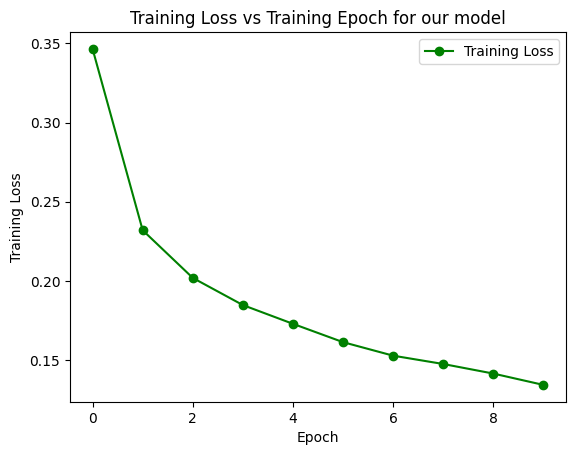

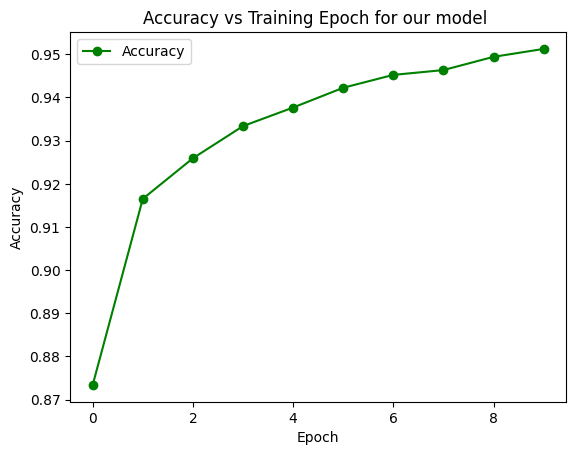

In [41]:
display("========================================")
display("-----------For Default Network----------")
display("========================================")
print("\n")
#training loss vs epoch
data_loss = data.history['loss']
epochs = range(0,10)
plt.plot(epochs, data_loss, 'g', marker = 'o', label='Training Loss')
plt.title('Training Loss vs Training Epoch for our model')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

#accuracy vs epoch
data_loss = data.history['accuracy']
epochs = range(0,10)
plt.plot(epochs, data_loss, 'g', marker = 'o', label='Accuracy')
plt.title('Accuracy vs Training Epoch for our model ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h3> Point 3.2 & 4.2 : Plots for My Own Network

'========================================'

'----------For My Own Network------------'

'========================================'

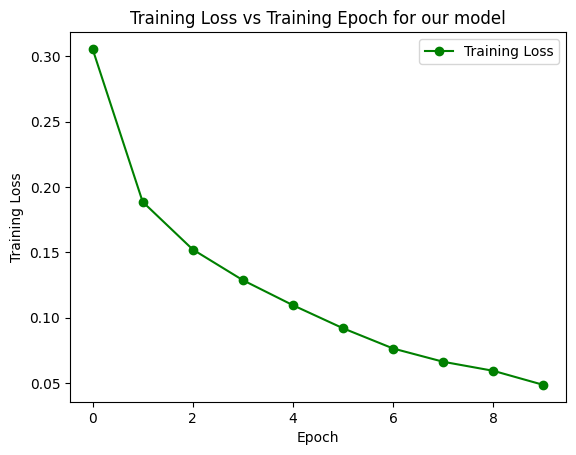

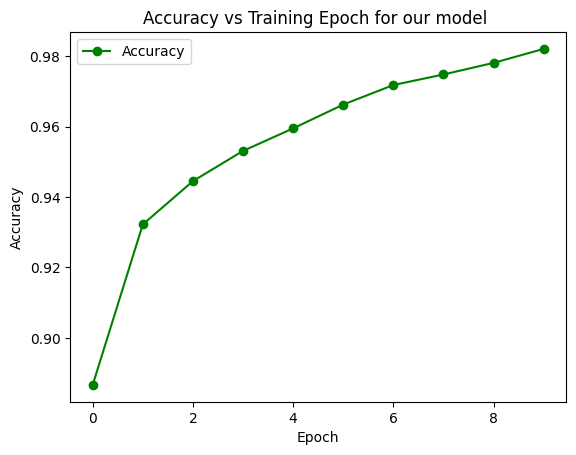

In [42]:
display("========================================")
display("----------For My Own Network------------")
display("========================================")
print("\n")
#training loss vs epoch
data_loss = fmnist_CNN_train_model.history['loss']
epochs = range(0,10)
plt.plot(epochs, data_loss, 'g', marker = 'o', label='Training Loss')
plt.title('Training Loss vs Training Epoch for our model')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

#accuracy vs epoch
data_loss = fmnist_CNN_train_model.history['accuracy']
epochs = range(0,10)
plt.plot(epochs, data_loss, 'g', marker = 'o', label='Accuracy')
plt.title('Accuracy vs Training Epoch for our model ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'=================================================='

'----------For My Own Network [Model 1]------------'

'=================================================='

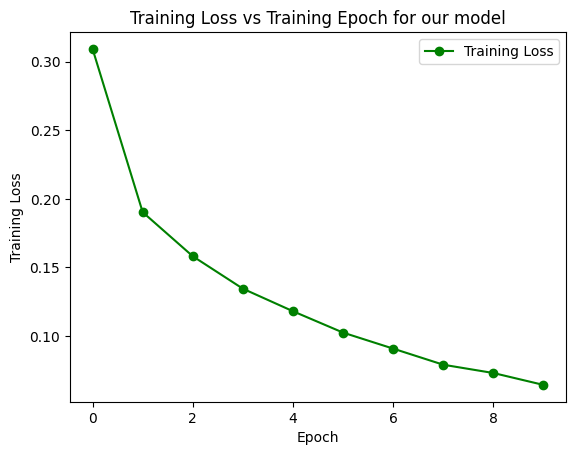

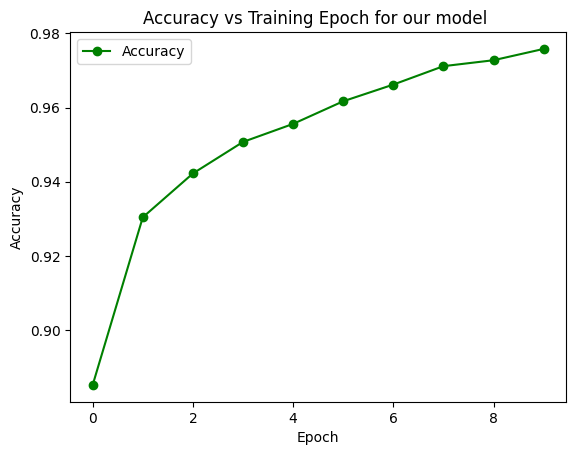

In [70]:
display("==================================================")
display("----------For My Own Network [Model 1]------------")
display("==================================================")
print("\n")
#training loss vs epoch
data_loss = testmodel1_trained.history['loss']
epochs = range(0,10)
plt.plot(epochs, data_loss, 'g', marker = 'o', label='Training Loss')
plt.title('Training Loss vs Training Epoch for our model')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

#accuracy vs epoch
data_loss = testmodel1_trained.history['accuracy']
epochs = range(0,10)
plt.plot(epochs, data_loss, 'g', marker = 'o', label='Accuracy')
plt.title('Accuracy vs Training Epoch for our model ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'=================================================='

'----------For My Own Network [Model 2]------------'

'=================================================='

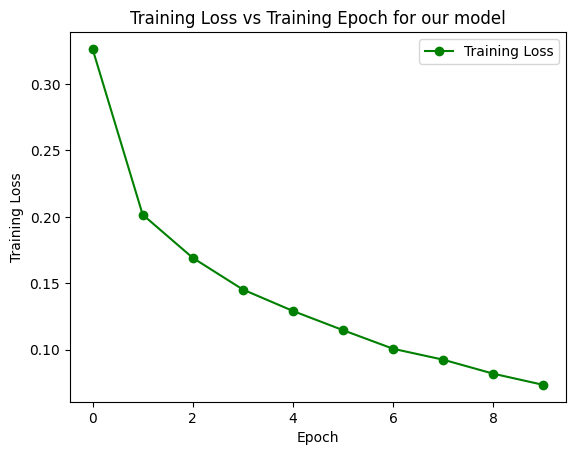

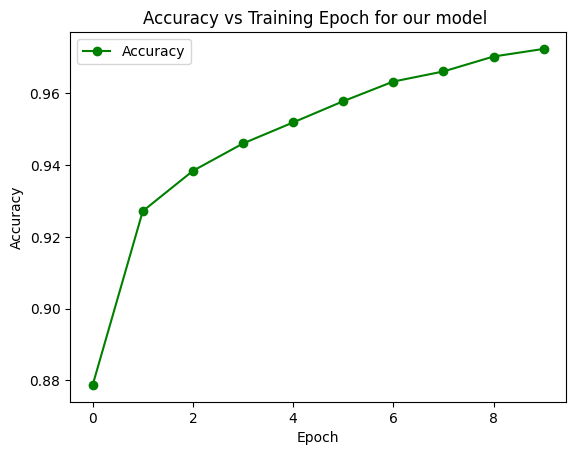

In [71]:
display("==================================================")
display("----------For My Own Network [Model 2]------------")
display("==================================================")
print("\n")
#training loss vs epoch
data_loss = testmodel2_trained.history['loss']
epochs = range(0,10)
plt.plot(epochs, data_loss, 'g', marker = 'o', label='Training Loss')
plt.title('Training Loss vs Training Epoch for our model')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

#accuracy vs epoch
data_loss = testmodel2_trained.history['accuracy']
epochs = range(0,10)
plt.plot(epochs, data_loss, 'g', marker = 'o', label='Accuracy')
plt.title('Accuracy vs Training Epoch for our model ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h2> Point No.5 : You can use any additional plots or tables to explain the performance of your approach.


In [74]:
history2 = fmnist_CNN_train_model.history
history3 = testmodel1_trained.history
history4 = testmodel2_trained.history

from prettytable import PrettyTable

# Define the training history data for each model
history1 = data.history
history2 = fmnist_CNN_train_model.history
history3 = testmodel1_trained.history
history4 = testmodel2_trained.history

# Create a table for the training history of model 0
table0 = PrettyTable()
table0.field_names = ["Epoch", "Loss", "Accuracy"]
for i in range(len(history1['loss'])):
    table0.add_row([i+1, history1['loss'][i], history1['accuracy'][i]])

# Create a table for the training history of model 1
table1 = PrettyTable()
table1.field_names = ["Epoch", "Loss", "Accuracy"]
for i in range(len(history2['loss'])):
    table1.add_row([i+1, history2['loss'][i], history2['accuracy'][i]])

# Create a table for the training history of model 2
table2 = PrettyTable()
table2.field_names = ["Epoch", "Loss", "Accuracy"]
for i in range(len(history3['loss'])):
    table2.add_row([i+1, history3['loss'][i], history3['accuracy'][i]])

# Create a table for the training history of model 3
table3 = PrettyTable()
table3.field_names = ["Epoch", "Loss", "Accuracy"]
for i in range(len(history4['loss'])):
    table3.add_row([i+1, history4['loss'][i], history4['accuracy'][i]])

# Print the tables
print("Default_CNN_Model Training History:")
print(table0)
print("\nFMNIST_CNN_MODEL Training History:")
print(table1)
print("\nModel 2 Training History:")
print(table2)
print("\nModel 3 Training History:")
print(table3)


Default_CNN_Model Training History:
+-------+---------------------+--------------------+
| Epoch |         Loss        |      Accuracy      |
+-------+---------------------+--------------------+
|   1   | 0.34655311703681946 | 0.8733999729156494 |
|   2   | 0.23201057314872742 | 0.9165166616439819 |
|   3   |  0.2018984705209732 | 0.9259166717529297 |
|   4   | 0.18474267423152924 | 0.9333666563034058 |
|   5   | 0.17288978397846222 | 0.937666654586792  |
|   6   | 0.16130730509757996 | 0.9422500133514404 |
|   7   |  0.1527659296989441 | 0.9452333450317383 |
|   8   | 0.14750772714614868 | 0.9463499784469604 |
|   9   |  0.1414618343114853 | 0.9494166374206543 |
|   10  | 0.13429716229438782 | 0.9512500166893005 |
+-------+---------------------+--------------------+

FMNIST_CNN_MODEL Training History:
+-------+---------------------+--------------------+
| Epoch |         Loss        |      Accuracy      |
+-------+---------------------+--------------------+
|   1   |   0.3056030273437

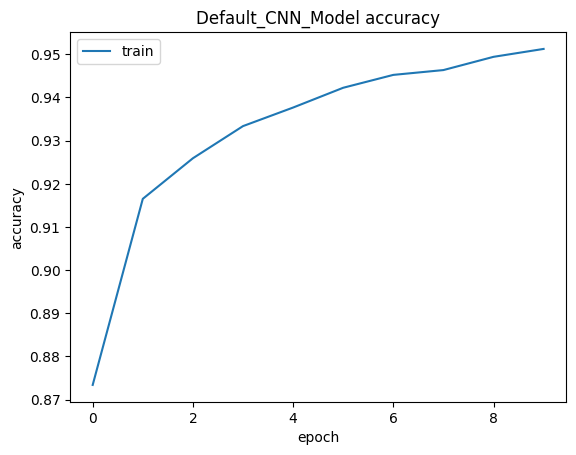

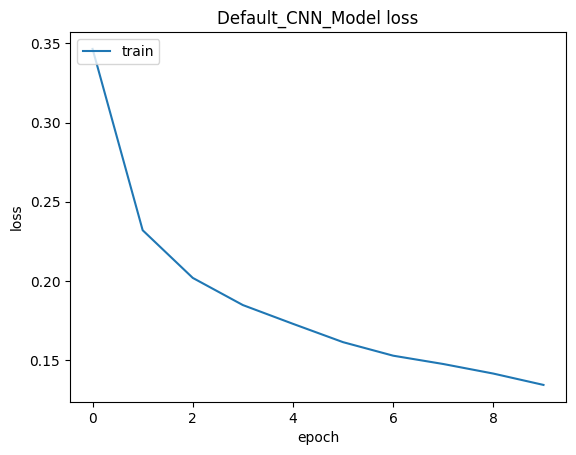

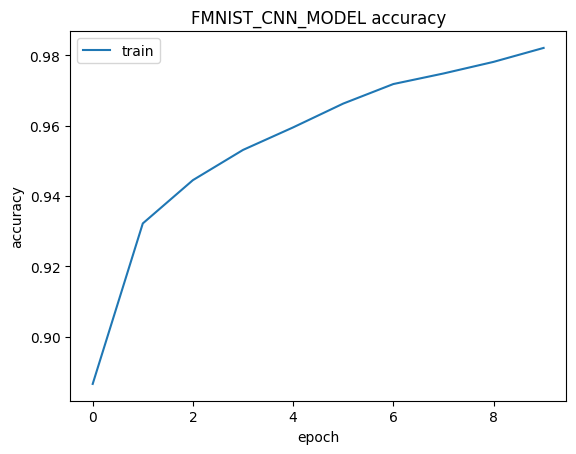

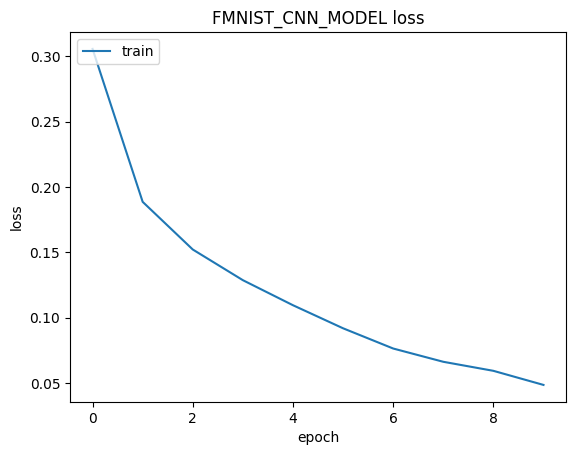

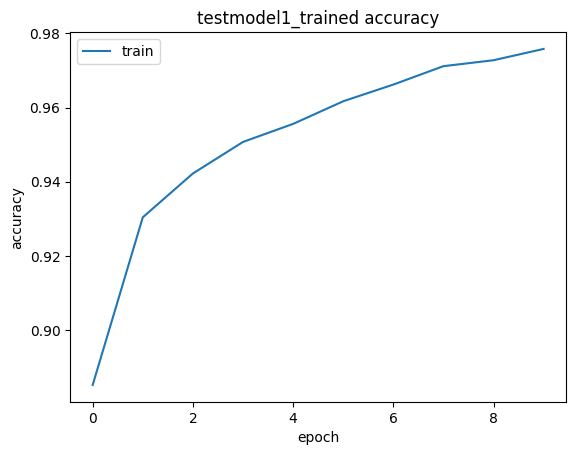

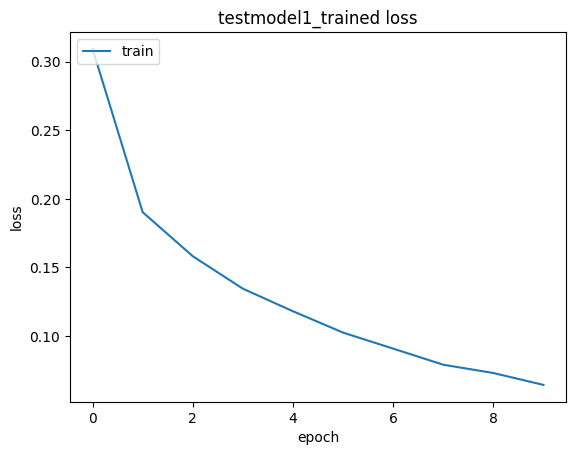

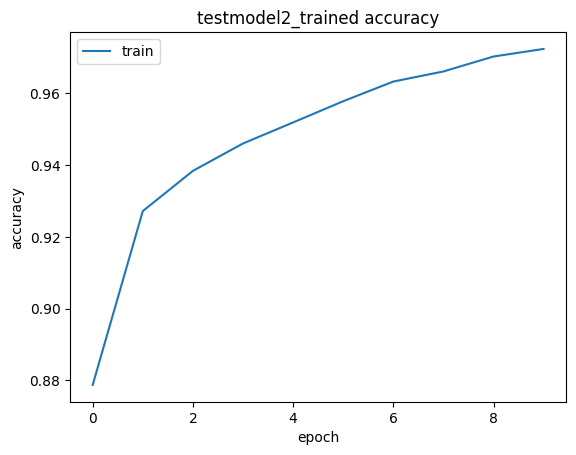

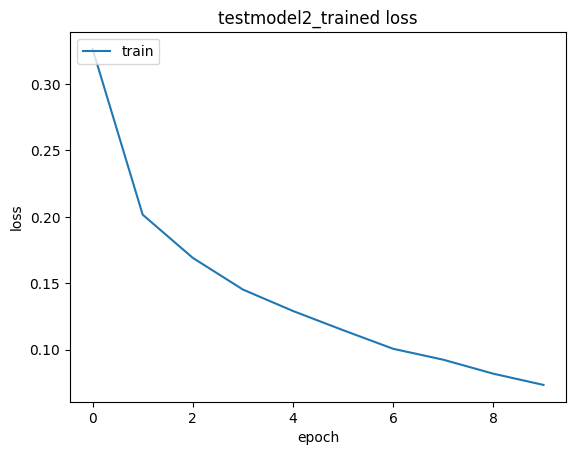

In [76]:
import matplotlib.pyplot as plt

# Plot the training history for model 0 (Default_CNN_Model)
plt.plot(history1['accuracy'])
plt.title('Default_CNN_Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history1['loss'])
plt.title('Default_CNN_Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot the training history for model 1 (FMNIST_CNN_MODEL)
plt.plot(history2['accuracy'])
plt.title('FMNIST_CNN_MODEL accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history2['loss'])
plt.title('FMNIST_CNN_MODEL loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot the training history for model 2 (testmodel1_trained)
plt.plot(history3['accuracy'])
plt.title('testmodel1_trained accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history3['loss'])
plt.title('testmodel1_trained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot the training history for model 3 (testmodel2_trained)
plt.plot(history4['accuracy'])
plt.title('testmodel2_trained accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history4['loss'])
plt.title('testmodel2_trained loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


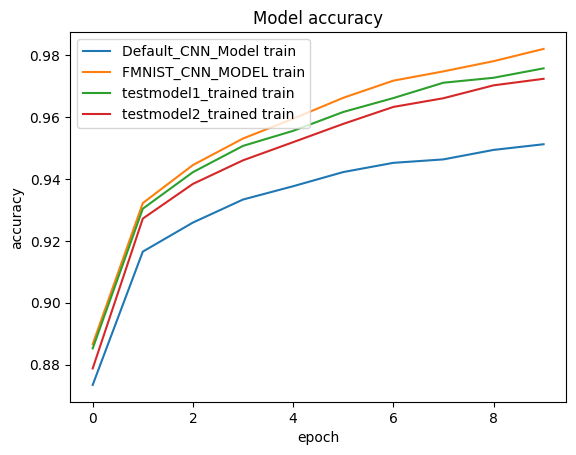

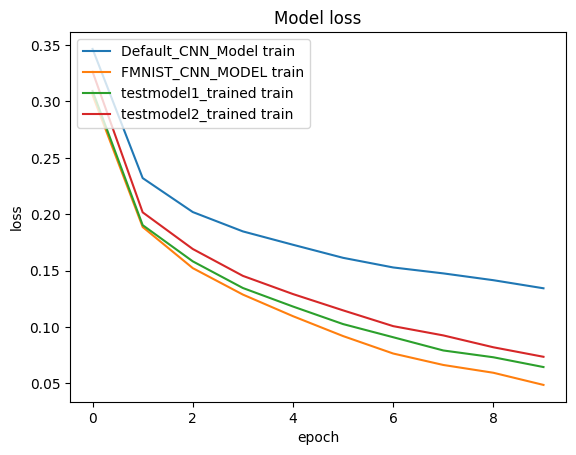

In [79]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy for all four models
plt.plot(history1['accuracy'])
plt.plot(history2['accuracy'])
plt.plot(history3['accuracy'])
plt.plot(history4['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Default_CNN_Model train', 
            'FMNIST_CNN_MODEL train',  
            'testmodel1_trained train', 
            'testmodel2_trained train'], loc='upper left')
plt.show()

# Plot the training and validation loss for all four models
plt.plot(history1['loss'])
plt.plot(history2['loss'])
plt.plot(history3['loss'])
plt.plot(history4['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Default_CNN_Model train', 
            'FMNIST_CNN_MODEL train',  
            'testmodel1_trained train',  
            'testmodel2_trained train'], loc='upper left')
plt.show()


Based on the plots generated, we can conclude that all four machine learning models exhibit an upward trend in accuracy and a downward trend in loss as the number of epochs increases. This suggests that the models are learning from the training data and improving their performance over time. 

We have used 3 ways to analyze our own result:
1. We made tables of loss and accuracy with trespect to their running epoch and presented it with table at the first. By which we can see that in each and every epoch, How much accuracy and loss that model is getting.

2. We plot a seperate graph of each and every model by which we can check and analyze the behaviour of the respective model.

3. We have analyze the Combine behaviour of each and every model by which we can get to know that `we are getting highest amount of accuracy in the first model which we have trained named as fmnist_CNN_model is getting highest accuracy`. For Loss, we are get to know that `we are getting less amount of loss in the first model which we have trained named as fmnist_CNN_model is getting less loss.`


That is why, For 4th question we will use this fmnist_CNN_model for encoding and analyze it more.




<h2> Own Encoding 

Let us take our own network for performing this task because in the question, it has written.

In this part, you should define a simple intermediate layer model using one of the later internal
layers from your trained network (ie. anything before softmax is possible, but some will work
better than others). This is your encoding. Then you will treat the elements of this encoding
as features in a dataset for clustering and visualization to help you understand what the mystery
label for our dataset might mean

In [46]:
# Embedding Use the output of the final Dense layer as the encoding 
# It is a 5-dimensional vector
encoding_model = tf.keras.Model(fmnist_CNN_model.layers[0].input, fmnist_CNN_model.layers[11].output)

In [47]:
encoding_model

In [48]:
# get an encoding on a sample data
X_encoding = encoding_model(x_test)
X_encoding.shape

TensorShape([10000, 64])

<h3> Visualize your encoding with the first two components from PCA, the colour mapping could
be the label values.

In [49]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_encoding)
pca.explained_variance_

array([176.05904764, 134.62611992])

In [50]:
X_pca = pca.transform(X_encoding)

In [51]:
y_test.shape,   X_pca.shape, y_test.shape

((10000, 5), (10000, 2), (10000, 5))

In [52]:
dum_y_test = np.argmax(y_test, axis=1)
dum_y_test

array([4, 2, 2, ..., 3, 2, 1])

In [53]:
import seaborn as sns

[]

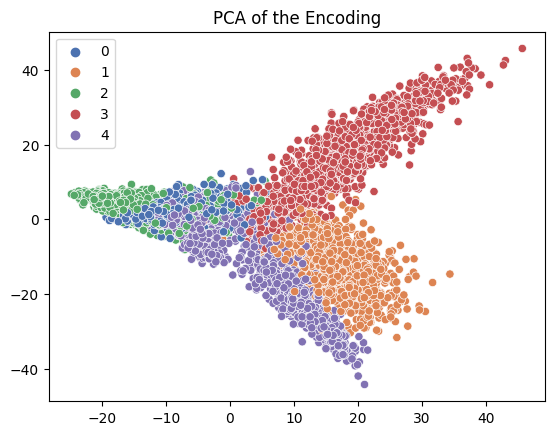

In [54]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dum_y_test.flatten(), palette="deep")
plt.title('PCA of the Encoding')
plt.plot()

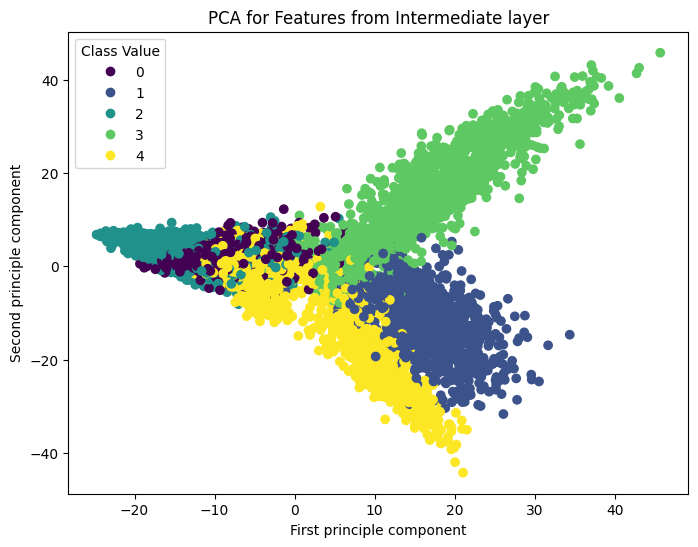

In [55]:
plt.figure(figsize=(8,6))
temp = plt.scatter(X_pca[:,0],X_pca[:,1],c=y_test_copy['0'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('PCA for Features from Intermediate layer')
plt.legend(handles=temp.legend_elements()[0], title="Class Value", labels=[ 0,1,2,3,4])

In [56]:
# Let's plot the average of images 
# X_enc_img = X_encoding.reshape([-1, 14, 14])
x_test_subset = x_test
y_test_subset = dum_y_test.flatten()

x_test_subset = x_test_subset.reshape((-1, 28, 28))


print("x_test_subset shape:", x_test_subset.shape)
print("y_test_subset shape:", y_test_subset.shape)

x_class_0 = np.mean(x_test_subset[y_test_subset == 0], axis=0)
x_class_1 = np.mean(x_test_subset[y_test_subset == 1], axis=0)
x_class_2 = np.mean(x_test_subset[y_test_subset == 2], axis=0)
x_class_3 = np.mean(x_test_subset[y_test_subset == 3], axis=0)
x_class_4 = np.mean(x_test_subset[y_test_subset == 4], axis=0)

x_test_subset shape: (10000, 28, 28)
y_test_subset shape: (10000,)


In [57]:
x_class = np.array([x_class_0, x_class_1, x_class_2, x_class_3, x_class_4])
x_class.shape

(5, 28, 28)

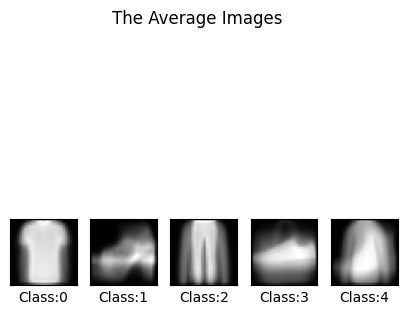

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(5,5))
for i in range(5):
    ax[i].imshow(x_class[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class:'+ str(i))

fig.suptitle('The Average Images')
plt.show()

<h2> Perform K-means clustering algorithms on the features that you have extracted from your own designed model with 5 clusters and visualize the results. Use the
resulting clusters as alternate colour mappings for the PCA plot above.

In [59]:
# KMEANS
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_encoding)
kmeans.labels_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10000,)

[]

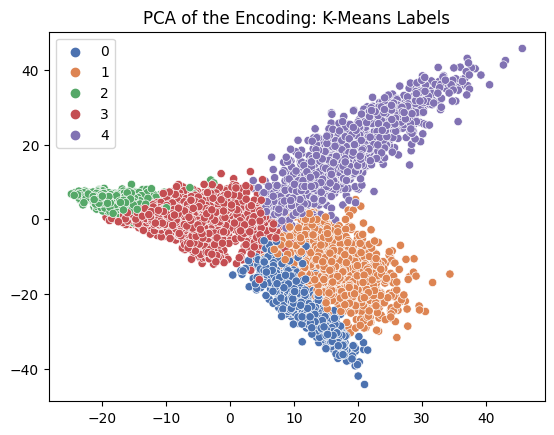

In [60]:
# Use the k-means labels for the PCA visualization
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette="deep")
plt.title('PCA of the Encoding: K-Means Labels')
plt.plot()

<h2> Perform DBSCAN clustering algorithms on the features that you have extracted from your own designed model with 5 clusters and visualize the results. Use the
resulting clusters as alternate colour mappings for the PCA plot above.

In [61]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=500, min_samples=8000).fit(X_encoding)
np.unique(clustering.labels_, return_counts=True) 

(array([0]), array([10000]))

[]

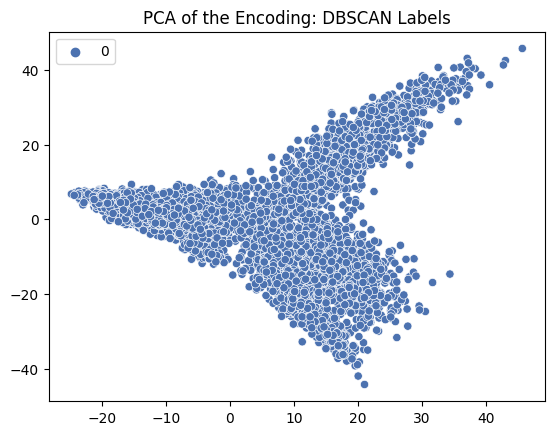

In [62]:
# Use the DBSCAN labels for the PCA visualization
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clustering.labels_, palette="deep")
plt.title('PCA of the Encoding: DBSCAN Labels')
plt.plot()

<h2> Apply t-SNE on the features that you have extracted for your own designed model and
visualize the results in the same way.


In [63]:
from sklearn.manifold import TSNE

In [64]:
# T-SNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_encoding)
X_embedded.shape

(10000, 2)

In [65]:
y_test_copy

,0
0,4
1,2
2,2
3,2
4,0
...,...
9995,4
9996,2
9997,3
9998,2


In [66]:
type(y_test_copy)

pandas.core.frame.DataFrame

[]

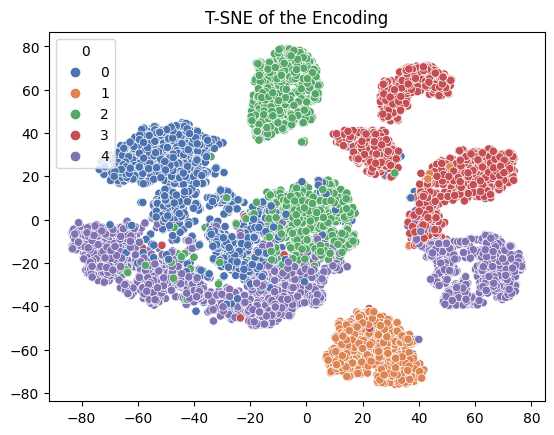

In [67]:
# T-SNE visualization
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_test_copy['0'], palette="deep")
plt.title('T-SNE of the Encoding')
plt.plot()

<H3> Kmeans visualization with TSNE:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Visualization of K-means clustering using t-SNE')

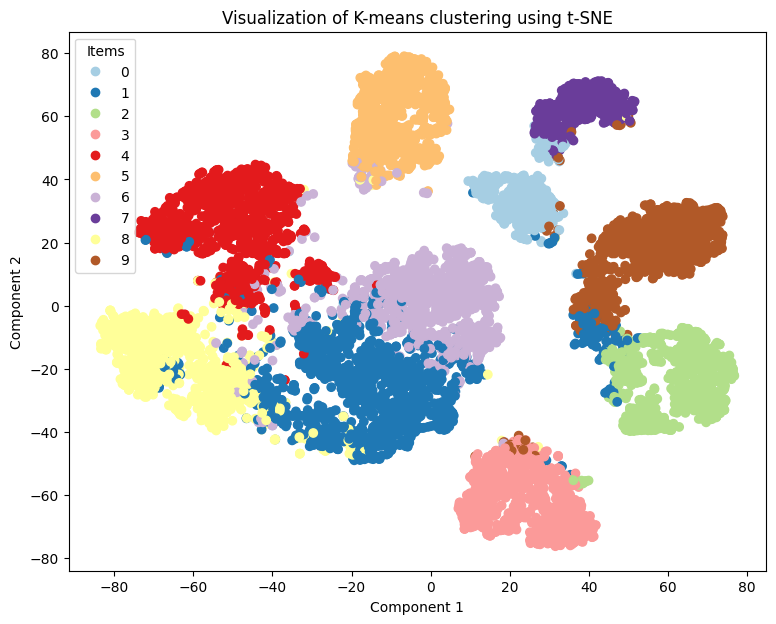

In [100]:
kmeans_labels_pca = kmeans.fit_predict(X_encoding)
plt.figure(figsize=[9,7])
scatter_pca = plt.scatter(X_embedded[:,0],X_embedded[:,1],c=kmeans.labels_,cmap='Paired')
handles,labels= scatter_pca.legend_elements()
plt.legend(handles,labels,title='Items')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Visualization of K-means clustering using t-SNE')


<h3> Visualizing images of test data using results from K-Means

cluster 0


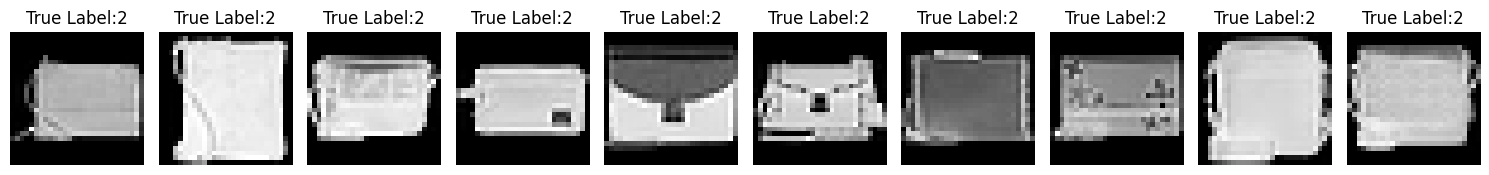

cluster 1


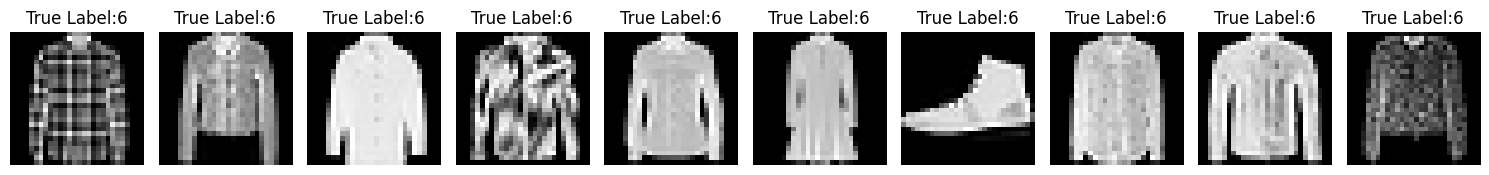

cluster 2


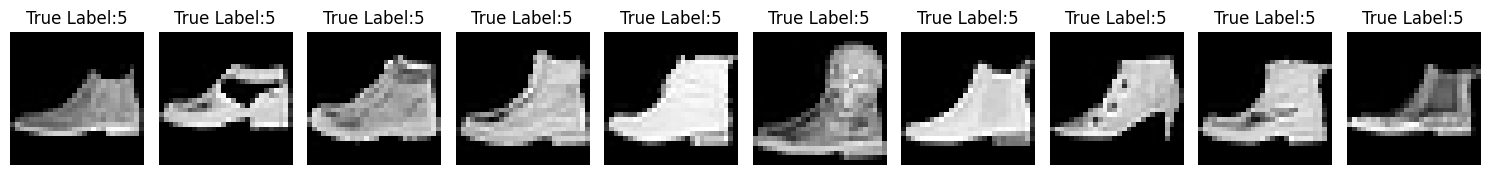

cluster 3


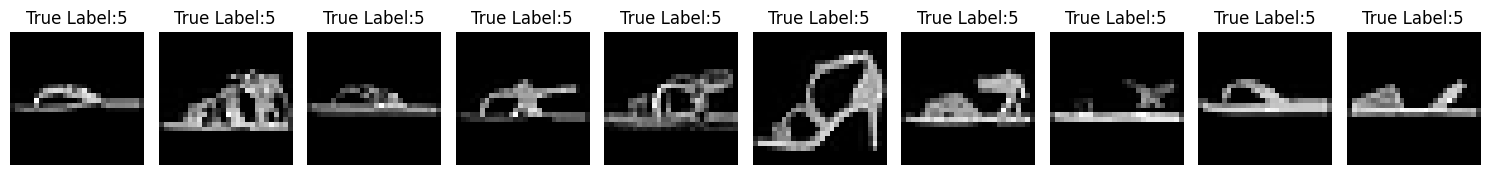

cluster 4


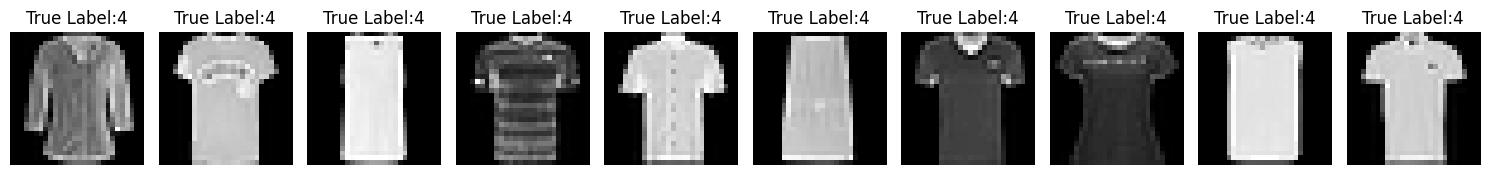

In [101]:
for i in range(0,5):
    row = np.where(kmeans_labels_pca==i)[0] # row in kmeans_labels_pca for elements of cluster i
    num = np.random.choice(row, size=(10,)) # number of elements for each cluster
    print("cluster "+str(i))
    fig, ax = plt.subplots(1, 10, figsize=(15, 15))
    for k in range(len(num)):
        image = x_test[row[k], ]
        ax[k].imshow(image, cmap='gray')
        ax[k].axis('off')
        ax[k].set_title(f"True Label:{kmeans_labels_pca[i]}")
    plt.tight_layout()
    plt.show()

<H3> DBSCAN clustering visualization using TSNE

Text(0.5, 1.0, 'Visualization of DBSCAN clustering using t-SNE')

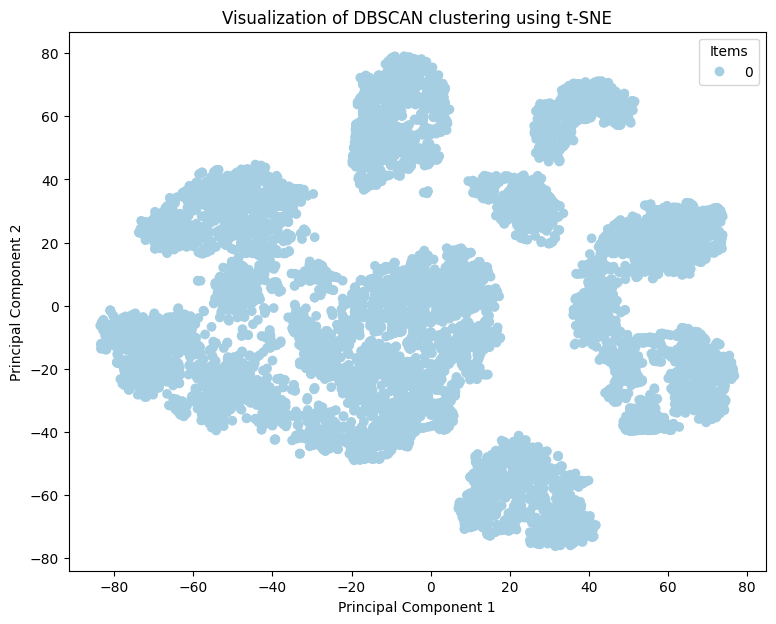

In [103]:
dbscan_labels_pca = clustering.fit_predict(X_encoding)
plt.figure(figsize=[9,7])
scatter_pca = plt.scatter(X_embedded[:,0],X_embedded[:,1],c=dbscan_labels_pca,cmap='Paired')
handles,labels= scatter_pca.legend_elements()
plt.legend(handles,labels,title='Items')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of DBSCAN clustering using t-SNE')

Basically DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.As per the graph, the class 0 is widely spread alongwith the
overlapping of class -1 which is getting overlapped with all the present classes

<h3> Predicting the correct and incorrect labels and visualizing the results of clustering to find the mystery label

313/313 [==============================] - 13s 43ms/step
Found correct labels 9373


<ipython-input-106-d24f53a1ae30>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


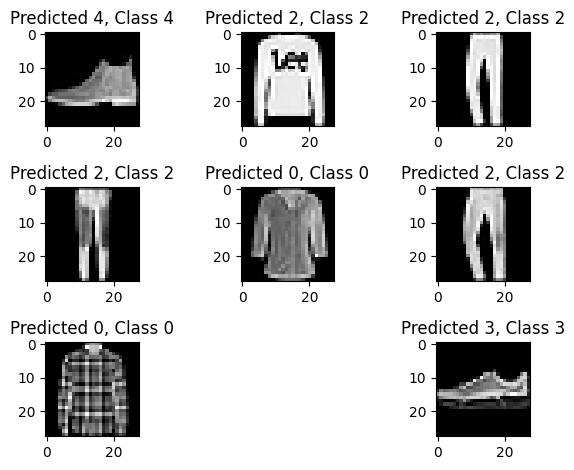

In [106]:
y_pred_CM2 = fmnist_CNN_model.predict(x_test)
y_pred_CM2_classes = [np.argmax(element) for element in y_pred_CM2]

correct = np.where(y_pred_CM2_classes==y_test_copy['0'])[0]
print("Found correct labels",len(correct))
for i, correct in enumerate(correct[:9]):
 plt.subplot(3,3,i+1)
 plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
 plt.title("Predicted {}, Class {}".format(y_pred_CM2_classes[correct], y_test_copy['0'].iloc[correct]))
 plt.tight_layout()

From the above image plots , we can observe that the labels mentioned above are predicted correctly , for instance the ankle boot and coat belonged to class 4 and they were predicted in class 4 only using our model.
I

<h2> In-correct Labels

313/313 [==============================] - 11s 36ms/step
Found incorrect labels 627


<ipython-input-107-b35de9519e96>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


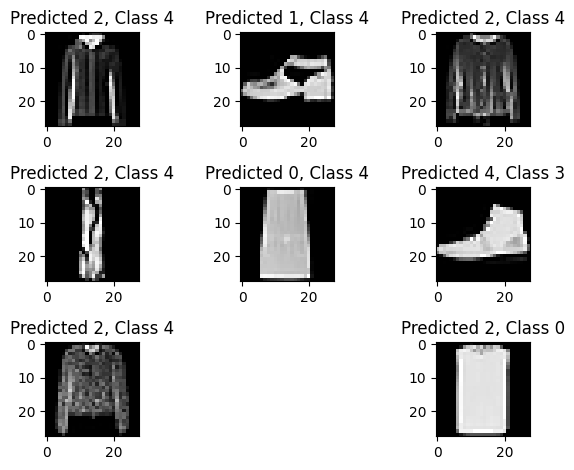

In [107]:
y_pred_CM2 = fmnist_CNN_model.predict(x_test)
y_pred_CM2_classes = [np.argmax(element) for element in y_pred_CM2]

incorrect = np.where(y_pred_CM2_classes!=y_test_copy['0'])[0]
print ("Found incorrect labels", len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
 plt.subplot(3,3,i+1)
 plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
 plt.title("Predicted {}, Class {}".format(y_pred_CM2_classes[incorrect], y_test_copy['0'].iloc[incorrect]))
 plt.tight_layout()


The above image plots shows few labels which were predicted incorrectly.

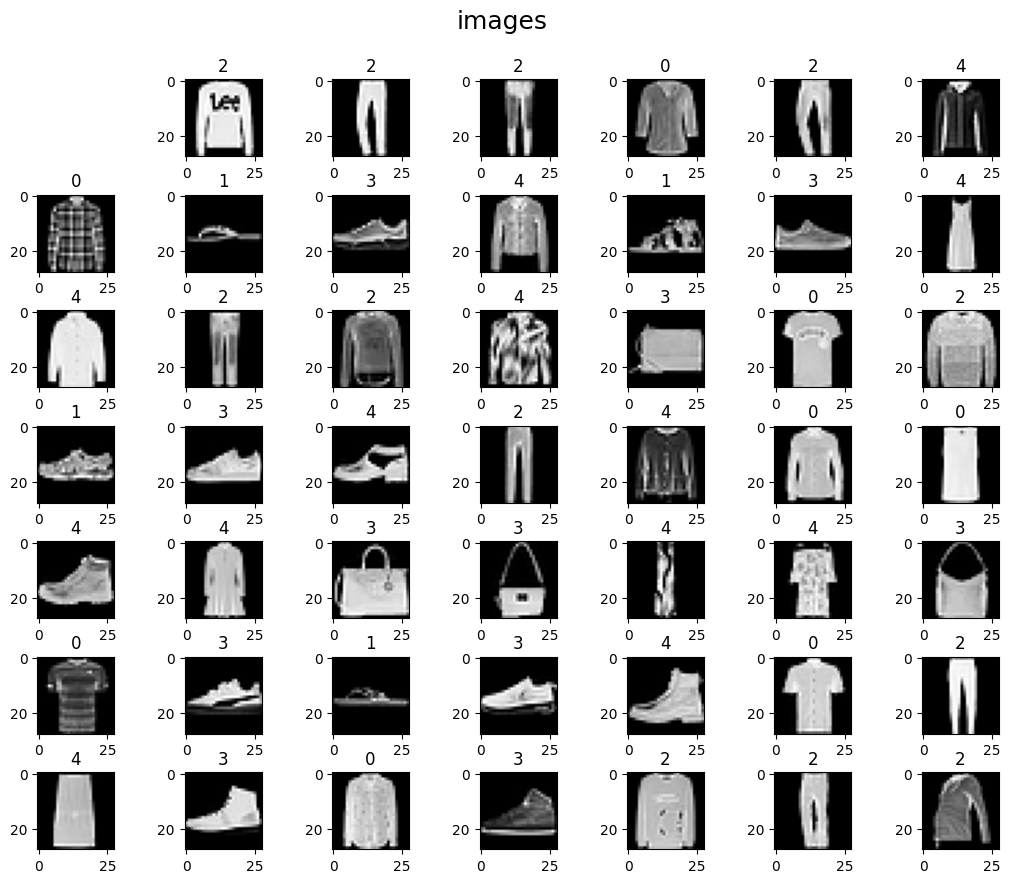

In [113]:
from PIL import Image
x_test_copy = pd.read_csv("x_test.csv")
rows=7
plt.figure(figsize=(13, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("images", fontsize=18, y=0.95)
for i in range(1,49):
 #print(i)
 #print(df_x_test[:i].shape)
 img=x_test_copy.iloc[i].values.reshape((28,28,1))
 pil_img = tf.keras.preprocessing.image.array_to_img(img)
 plt.subplot(rows,7,i+1)
 plt.title(y_test_copy['0'].iloc[i])
 plt.imshow(pil_img,cmap='gray')

As we have address the following points in the above analysis, Visualize your encoding with the first two components from PCA, the colour mapping could
be the label values.

• Perform DBSCAN and K-means clustering algorithms on the features that you have extracted from your own designed model with 5 clusters and visualize the results. Use the
resulting clusters as alternate colour mappings for the PCA plot above.

• Apply t-SNE on the features that you have extracted for your own designed model and
visualize the results in the same way.

• Based on the results of clustering and t-SNE can you guess what are the labels for the
given dataset? It might also help to list out a random selection of data entries (the original
images) for each cluster and their label value to help understand the patterns each cluster
might represent.

• Feel free to try some other approach to using this encoding in a creative way.
-> For this we have done lot of things in above code snippets.

=================================================================================================================
```
We have checked that how many labels are correctly identified and how many are incorrectly identified?
```
```
Correctly identified Lables                : 9373 samples

Incorrectly identified Lables              : 627 samples

Total Labels that we have in Test Data set : 10,000 samples
```

=================================================================================================================
Based on the results of the clustering and also visualizing the images for the mystery label we can observe the following :
1. Category 0 : Shirts/T-Shirts/Top
2. Category 1 : Sandals/Slippers
3. Category 2 : Pullover/Trouser
4. Category 3 : Sneakers/Bags
5. Category 4 : Dress/Ankle Boots/Coat

=================================================================================================================





